# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression</a></span></li><li><span><a href="#How-good-is-our-model?" data-toc-modified-id="How-good-is-our-model?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How good is our model?</a></span></li><li><span><a href="#Calculate-the-R2-of-the-model" data-toc-modified-id="Calculate-the-R2-of-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate the R2 of the model</a></span></li><li><span><a href="#Linear-regression-with-sklearn" data-toc-modified-id="Linear-regression-with-sklearn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear regression with sklearn</a></span></li><li><span><a href="#Linear-regression-with-statsmodels" data-toc-modified-id="Linear-regression-with-statsmodels-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Linear regression with statsmodels</a></span></li><li><span><a href="#OLS-Concepts" data-toc-modified-id="OLS-Concepts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>OLS Concepts</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Linear-model-extensions" data-toc-modified-id="Linear-model-extensions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Linear model extensions</a></span><ul class="toc-item"><li><span><a href="#Challenging-the-additive-assumption:-synergy" data-toc-modified-id="Challenging-the-additive-assumption:-synergy-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Challenging the additive assumption: synergy</a></span></li></ul></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#$R^2$-Adjusted" data-toc-modified-id="$R^2$-Adjusted-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>$R^2$ Adjusted</a></span></li></ul></li><li><span><a href="#Potential-problems-in-linear-regression" data-toc-modified-id="Potential-problems-in-linear-regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Potential problems in linear regression</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-Materials" data-toc-modified-id="Further-Materials-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Further Materials</a></span></li></ul></div>

In [4]:
#!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [ ]:
"""
LINEAR REGRESSION?

linear progression but in the FUTURE 🔮 and the past
predicts the future


a line that summarizes the datapoints
    - on an x/y axis
    - if we have good summary
        - we can guess the value of a datapoint we don't have
        - can be: within the range of the data
        - or out of the range
"""

## Motivation

We have 100 students, and we know:
 * How many hours they studied for their exam
 * The grade they have obtained (from 0 to 100)

### Exploratory Analysis

In [2]:
df = pd.read_csv("../datasets/hours_vs_mark.csv")

In [3]:
df

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


In [4]:
df.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


In [ ]:
# distribution
# hisplot
sns.histplot(x=df.hours);
plt.axvline(df.hours.mean(), c="red", label="mean", size=10)
plt.axvline(df.hours.median(), c="yellow", label="median")
plt.legend();

In [13]:
"""
HOURS
50% to the left and 50% to the right: median is the same as q2, and the average

"""

'\nHOURS\n50% to the left and 50% to the right: median is the same as q2, and the average\n\n'

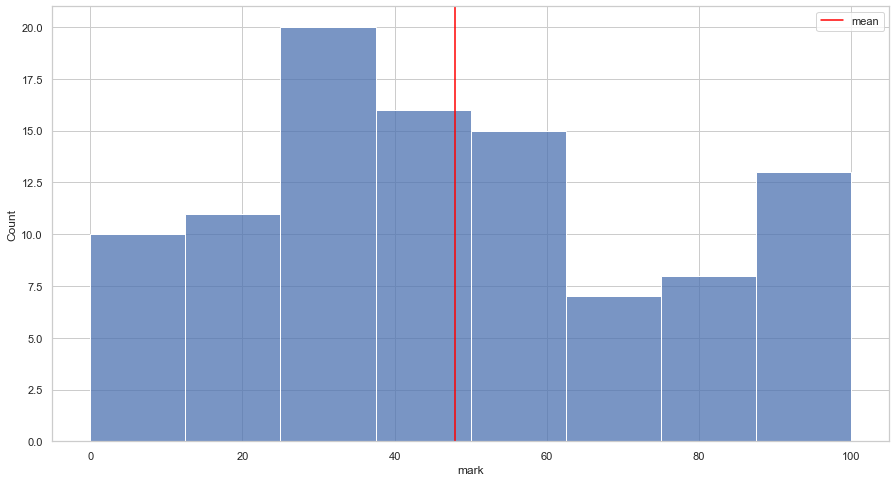

In [15]:
sns.histplot(x=df.mark);
plt.axvline(df.mark.mean(), c="red", label="mean")
plt.legend();

"""Most of the people fail (if we use 50/50)
US ->70/30
"""

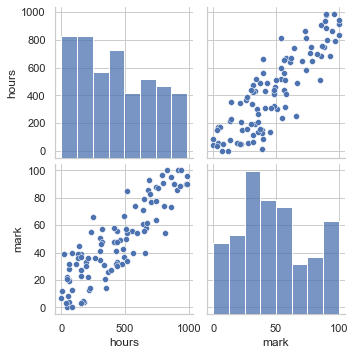

In [16]:
sns.pairplot(df);

In [ ]:
"""
there seems to be a correlation between hours and grades
as one variable changes, the other changes as well
as you go along the X axis, the Y axis changes too
positive or negtive? -> positive

Scale of CORRELATION? -1, 1
"""

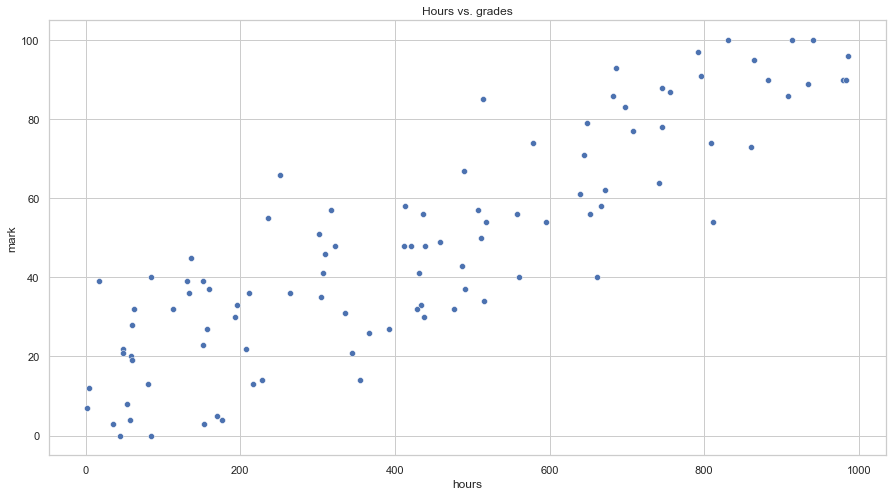

In [19]:
sns.scatterplot(x=df.hours, y=df.mark)
plt.title("Hours vs. grades");

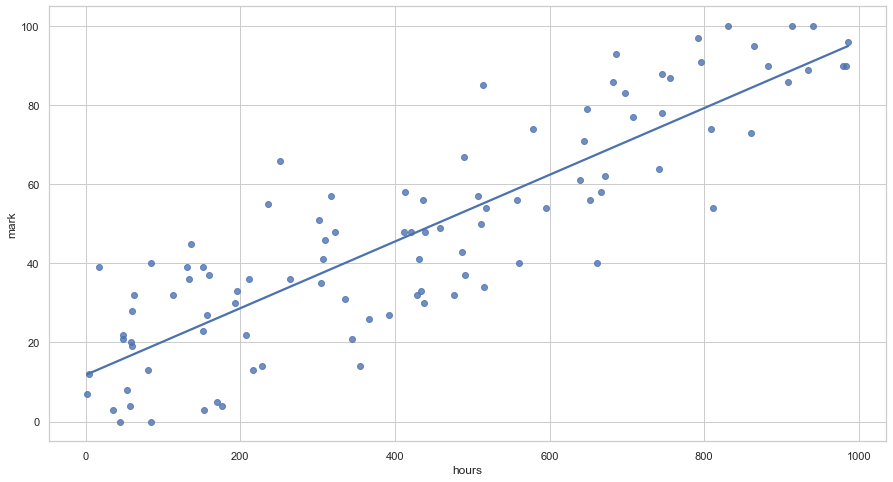

In [22]:
sns.regplot(x=df.hours, y=df.mark, ci=None);

We would like to understand the relationship $$grade = f(hours)$$

To be able to **predict the expected grade** that we will obtain when studying a certain number of hours

Let's try a $$Y = m * X + n$$ linear regression
$m$ is the slope
$n$ is the value of $Y$ when $X=0$
And we have to:
$$grade = m * hours + n$$
We want to find $m$ and $n$ that *best* model our data


In [23]:
df["prediction_1"] = 0.1 * df.hours + 5 # 𝑌=𝑚∗𝑋+𝑛
df["prediction_2"] = 0.12 * df.hours + 10 #𝑔𝑟𝑎𝑑𝑒=𝑚∗ℎ𝑜𝑢𝑟𝑠+𝑛

In [25]:
# calculate the error: reality vs. prediction
# reality: hours & mark

# independant variable: IV, hours 
# dependant variable: DV, grades
    # dependant: the one to be predicted
    # the one we don't control over
    
    # independant variable: the one you have control over
    # measure the result of the dependant
    
    # medication affecting blood pressure
        # medication: pills & placebo: independant one
        # blood pressure: dependant, it depends on the independant
    
df

,hours,mark,prediction_1,prediction_2
0,865,95,91.5,113.80
1,4,12,5.4,10.48
2,305,35,35.5,46.60
3,437,56,48.7,62.44
4,682,86,73.2,91.84
...,...,...,...,...
95,252,66,30.2,40.24
96,49,21,9.9,15.88
97,792,97,84.2,105.04
98,310,46,36.0,47.20


In [26]:
df["error_1"] = (df["mark"] - df.prediction_1).abs()
df["error_2"] = (df["mark"] - df.prediction_2).abs()

In [27]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,91.5,113.80,3.5,18.80
1,4,12,5.4,10.48,6.6,1.52
2,305,35,35.5,46.60,0.5,11.60
3,437,56,48.7,62.44,7.3,6.44
4,682,86,73.2,91.84,12.8,5.84
...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76
96,49,21,9.9,15.88,11.1,5.12
97,792,97,84.2,105.04,12.8,8.04
98,310,46,36.0,47.20,10.0,1.20


In [28]:
# mean (average) absolute (positive) error
# MAE: mean absolute error

mae_prediction_1 = df["error_1"].mean()
mae_prediction_2 = df["error_2"].mean()

In [29]:
mae_prediction_1 # MAE: 12.008, on average, the model is wrong by 12ish points

12.008

In [30]:
mae_prediction_2# MAE: 18.073599999999995, on average, the model is wrong by 18ish points

18.073599999999995

In [31]:
#mae_prediction_1 is better than mae_prediction_2
# because the error is on average lower

Which has worked better? How can we measure the error of the models?

We can subtract our prediction from the grade to see what we have done wrong in each one and make the average.... we use the absolute value to remove the negative values ​​and then we talk about this error, which has a name and it is MAE (mean absolutely error)

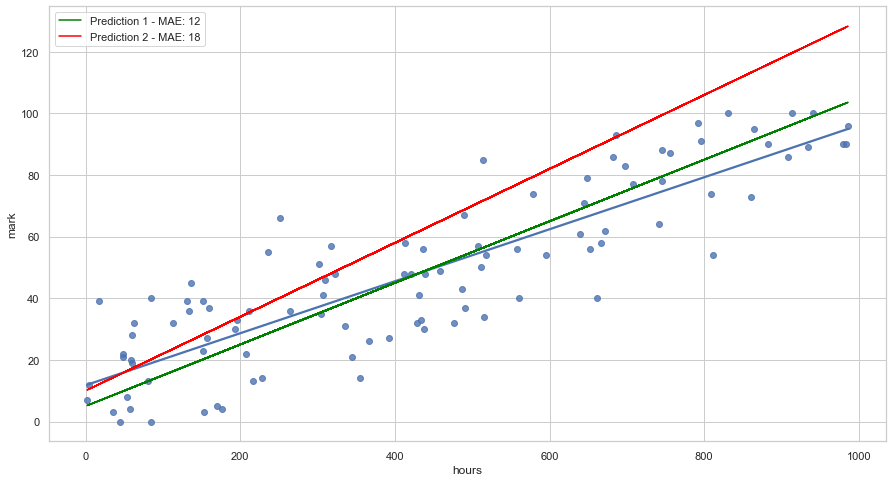

In [33]:
sns.regplot(x=df.hours, y=df.mark, ci=None)
plt.plot(df.hours, df.prediction_1, c="green", label="Prediction 1 - MAE: 12")
plt.plot(df.hours, df.prediction_2, c="red", label="Prediction 2 - MAE: 18")
plt.legend();

# 12 marks off vs 18 marks off

In [ ]:
"""all models are wrong but some are useful"""

In [ ]:
"""
A linear regression
is a line 
that summarizes the datapoints in two qtve variables

the line minimizes the distance between all the points and the line
best model will be the one with lower error
"""

What is going to be our goal? Python and its libraries do this for us, it calculates the slope and the intercept to be able to make "predictions" of unknown data from data that we already have.

## Simple linear regression

Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable. Mathematically, it can be expressed as:

![formula](../images/formula.png)

If we dig a little deeper, we can find this other expression:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
* $X$ = predictor variable
* $Y$ = target variable
* $\beta_0$ = intercept
* $\beta_1$ = slope / slope
* $\epsilon$ = noise (gaussian)


The above equation is known as the *population regression line*.
The simple linear regression line usually has the form shown in the formula above, where β0 and β1 are unknown constants, representing the intercept and slope of the regression line, respectively.

The intercept is the value of the dependent variable (Y) when the independent variable (X) has a value of zero (0). The slope is a measure of the rate at which the dependent variable (Y) changes when the independent variable (X) changes by one (1). The unknown constants are called the coefficients or parameters of the model. This form of the regression line is sometimes known as a population regression line and, as a probabilistic model, it roughly fits the data set hence the use of the symbol (≈) in the image. The model is called probabilistic because it does not model all the variability of the dependent variable (Y)

In [34]:
lr = LinearRegression()

In [35]:
lr

LinearRegression()

In [36]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [38]:
# 1. Instantiate

lr = LinearRegression()


# 2. Draw the line on my data: FIT the line to the points

# y = mx + n
# dependant = independant * factor + n(value ox Y axis when X is 0)
# grades = hours * factor + n

X = df[["hours"]] # X is a DF, 2-d, two brackets
y = df["mark"] # y is a SERIES, 1-d, one bracket

lr.fit(X, y)

LinearRegression()

In [47]:
lr

LinearRegression()

In [48]:
[i for i in dir(lr)]

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [50]:
lr.intercept_ # n, the value of Y when X=0

11.78070717807148

In [51]:
lr.coef_ # array with ONE element (could be more)

array([0.08437787])

In [ ]:
# grade = hours * 0.08437787 + 11.78070717807148

In [52]:
grade = 400 * 0.08437787 + 11.78070717807148 # line -> l.regression summarizing and predicting the data
grade

45.53185517807148

In [45]:
df[["hours", "mark"]].sample()

,hours,mark
68,672,62


In [46]:
df[df["hours"] > 50].sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2
90,413,58,46.3,59.56,11.7,1.56


In [53]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,91.5,113.80,3.5,18.80
1,4,12,5.4,10.48,6.6,1.52
2,305,35,35.5,46.60,0.5,11.60
3,437,56,48.7,62.44,7.3,6.44
4,682,86,73.2,91.84,12.8,5.84
...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76
96,49,21,9.9,15.88,11.1,5.12
97,792,97,84.2,105.04,12.8,8.04
98,310,46,36.0,47.20,10.0,1.20


In [ ]:
# grade = hours * 0.08437787 + 11.78070717807148
# fitting the model: figuring out the equation
     # fitting the model: describing the stereotype: people are THIS way (fitting)

In [54]:
df["prediction_through_scikit_learn"] = lr.coef_[0] * df.hours + lr.intercept_

In [55]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_scikit_learn
0,865,95,91.5,113.80,3.5,18.80,84.767566
1,4,12,5.4,10.48,6.6,1.52,12.118219
2,305,35,35.5,46.60,0.5,11.60,37.515958
3,437,56,48.7,62.44,7.3,6.44,48.653837
4,682,86,73.2,91.84,12.8,5.84,69.326415
...,...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76,33.043931
96,49,21,9.9,15.88,11.1,5.12,15.915223
97,792,97,84.2,105.04,12.8,8.04,78.607981
98,310,46,36.0,47.20,10.0,1.20,37.937847


In [56]:
df["error_sickit_learn"] = (df["prediction_through_scikit_learn"] - df["mark"]).abs()

In [57]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_scikit_learn,error_sickit_learn
0,865,95,91.5,113.80,3.5,18.80,84.767566,10.232434
1,4,12,5.4,10.48,6.6,1.52,12.118219,0.118219
2,305,35,35.5,46.60,0.5,11.60,37.515958,2.515958
3,437,56,48.7,62.44,7.3,6.44,48.653837,7.346163
4,682,86,73.2,91.84,12.8,5.84,69.326415,16.673585
...,...,...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76,33.043931,32.956069
96,49,21,9.9,15.88,11.1,5.12,15.915223,5.084777
97,792,97,84.2,105.04,12.8,8.04,78.607981,18.392019
98,310,46,36.0,47.20,10.0,1.20,37.937847,8.062153


In [59]:
mae_prediction_1 = df["error_1"].mean()
mae_prediction_2 = df["error_2"].mean()
mae_scikit = df["error_sickit_learn"].mean()

In [60]:
mae_prediction_1 # manual try number one

12.008

In [61]:
mae_prediction_2 # manual try number two

18.073599999999995

In [62]:
mae_scikit # python

11.402698299019335

In [64]:
X = df[["hours"]]
df["new_prediction"] = lr.predict(X)

In [65]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_scikit_learn,error_sickit_learn,new_prediction
0,865,95,91.5,113.80,3.5,18.80,84.767566,10.232434,84.767566
1,4,12,5.4,10.48,6.6,1.52,12.118219,0.118219,12.118219
2,305,35,35.5,46.60,0.5,11.60,37.515958,2.515958,37.515958
3,437,56,48.7,62.44,7.3,6.44,48.653837,7.346163,48.653837
4,682,86,73.2,91.84,12.8,5.84,69.326415,16.673585,69.326415
...,...,...,...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76,33.043931,32.956069,33.043931
96,49,21,9.9,15.88,11.1,5.12,15.915223,5.084777,15.915223
97,792,97,84.2,105.04,12.8,8.04,78.607981,18.392019,78.607981
98,310,46,36.0,47.20,10.0,1.20,37.937847,8.062153,37.937847


## How good is our model?

In [ ]:
# MAE: on average how wrong it is
    # model 1 is better on average than model 2
    # relative measure (relative to other models)
    
# absolute way: how good the model is?
    # model relative to the data
    # to what extent this model is adjusted to the datapoints
    # this depends on the scale of grades
    # find a metric: how good it is
    
    # percentage of variance that the model can explain
        # RSS
        # TSS

The numerical difference between the *least squares regression line* and the actual value is called the *residual* , and it represents the error in the estimate: $e = y_i - \hat{y}$.
The regression line minimized the **Residual Sum of Squares** (RSS)

The residual sum of squares measures the amount of error remaining between the regression function and the data set. a smaller residual sum of squares represents a regression function. The residual sum of squares, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

In [67]:
df.columns

Index(['hours', 'mark', 'prediction_1', 'prediction_2', 'error_1', 'error_2',
       'prediction_through_scikit_learn', 'error_sickit_learn',
       'new_prediction'],
      dtype='object')

In [69]:
RSS = ((df["prediction_through_scikit_learn"] - df.mark) ** 2).sum()
RSS # Residual Sum of Squares (RSS)

18931.609105092302

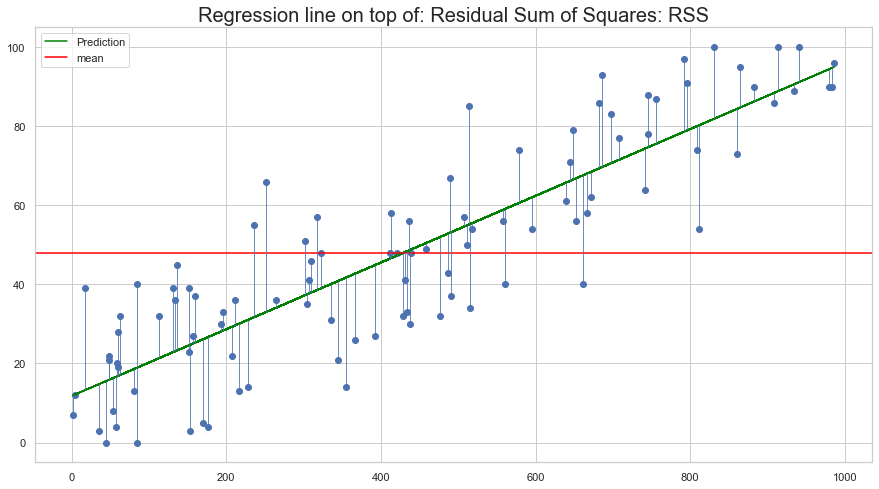

In [76]:
plt.scatter(X, y)
plt.plot(df.hours, df["prediction_through_scikit_learn"], c="green", label="Prediction")
plt.axhline(df["mark"].mean(), c="red", label="mean")
plt.vlines(X,  df["prediction_through_scikit_learn"], y, lw=0.8)
plt.title("Regression line on top of: Residual Sum of Squares: RSS", size=20)
plt.legend();

If we only used the mean as the predicted value for each prediction, the error we would make is (**total sum of squares**)

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$
Let's consider this our starting point, make a prediction and plot it

In [70]:
TSS = ((df.mark - df.mark.mean()) ** 2).sum()

In [71]:
TSS

76279.64

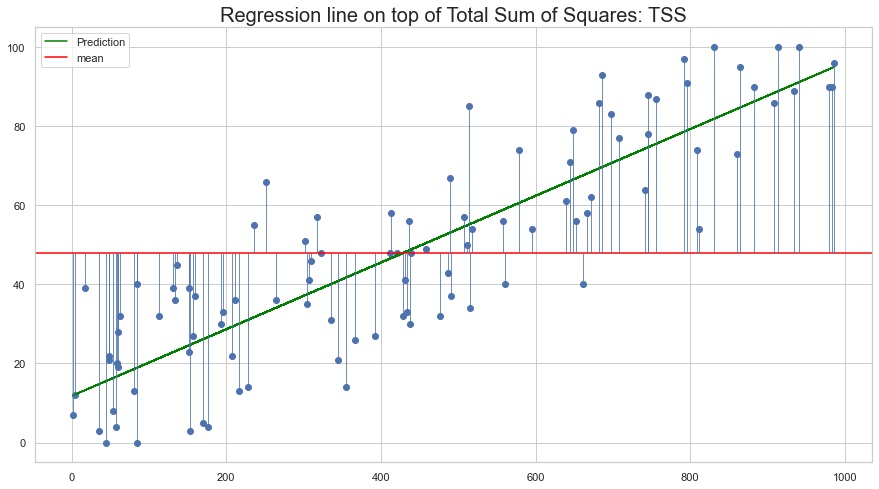

In [78]:
plt.scatter(X, y)
plt.plot(df.hours, df["prediction_through_scikit_learn"], c="green", label="Prediction")
plt.axhline(df["mark"].mean(), c="red", label="mean")
plt.vlines(X, df.mark.mean(), y, lw=0.8)
plt.title("Regression line on top of Total Sum of Squares: TSS", size=20)
plt.legend();

In [72]:
r_score = (TSS - RSS) / TSS

In [73]:
r_score # .75 -> the model is able to explain up to 75% of the variance of the data

0.751813077446455

In [ ]:
# RSS + TSS -> metric (r2)

In [74]:
mae_scikit # On average, the model is wrong by 12 points 

11.402698299019335

In [75]:
r_score # 0-1 -> 0 explains nothing, 1 is a perfect model

0.751813077446455

Recall that linear regression coefficients minimize the $RSS=Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that remains unexplained after running the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained by X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is nothing more than the square of the *Pearson* correlation coefficient that we already know.

In [ ]:
# Regression

# how bad it is
# MAE: mean absolute error: in the same scale of the data
# MSE: its not eh same scale (it's squared): more sensitive to outliers
# RMSE: more sensitive to outliers + same scale of the data

# r2: how good it is

In [81]:
from sklearn import metrics

mae = metrics.mean_absolute_error(df.mark, df.prediction_through_scikit_learn)
mse = metrics.mean_squared_error(df.mark, df.prediction_through_scikit_learn)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(df.mark, df.prediction_through_scikit_learn)

In [82]:
print(f"MAE is: {mae}")
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}") 
print(f"----------") 
print(f"r2 is: {r2}") 

MAE is: 11.402698299019335
MSE is: 189.31609105092303
RMSE is: 13.759218402617318
----------
r2 is: 0.7518130774464549


## Calculate the R2 of the model

$R^2$ measures how good our regression model is. The bigger the better. It is a value between 0 and 1

**NOTE**: it is computable for any model, it does not matter if it is linear or not. Only the actual and predicted values ​​are needed.

## Linear regression with sklearn

# 1. Select the data: `my_variables = X, y` # independant X, dependant y. target variable -> y (grades)
# 2. Fit the model to the data: `my_model = lr.fit(X, y)`
# 3. Predict with the model fitted: `predicted_y = lr.predict(X)`

In [118]:
from sklearn import metrics

**Calculation of the absolute mean error, the mean square error and the mean square error

- **MAE** is the easiest to understand, because it is the mean error.
- **The MSE** is more popular than the MAE, because the MSE accounts for larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**: we want to minimize them.

In [121]:
mae = metrics.mean_absolute_error(df.mark, df.prediction_through_scikitlerarn)
mse = metrics.mean_squared_error(df.mark, df.prediction_through_scikitlerarn)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(df.mark, df.prediction_through_scikitlerarn)

In [126]:
print(f"MAE is: {mae}")
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}")
print(f"r2 is: {r2}")

MAE is: 11.402698299019335
MSE is: 189.31609105092303
RMSE is: 13.759218402617318
r2 is: 0.7518130774464549


Read more about MAE, MSE, RMSE AND R2 [here](http://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

## Linear regression with statsmodels

A bit of [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

And [this article](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) that summarizes how to interpret OLS summary information

In [83]:
# OLS
# Ordinary Least Squares: the shortest distance (average) between data point and line (it is squared)

In [ ]:
#statsmodel f.

In [88]:
# 1. Instantiate the model

result = smf.ols("mark ~ hours", data = df).fit()

In [89]:
# 2. Fit the model
#result.fit()

In [90]:
# 3. Read the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.04e-31
Time:                        12:48:08   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
smf.ols("mark ~ hours", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.04e-31
Time:                        12:48:17   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Concepts

- <b>R2</b> : The coefficient of determination measures how much of the variation of 𝑦 is explained by the model.
If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is equal to zero.


- <b>𝑅¯2 </b> : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analyzed case) and the amount of data 𝑁

- <b>P value </b> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (has no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values ​​are used to determine which terms should be kept in the regression model.


Description of the p value:
The p-value is a probability value, so it ranges between 0 and 1. The p-value shows us the probability of having obtained the result that we have obtained assuming that the null hypothesis H0 is true. It is often said that high values ​​of p do not allow H0 to be rejected, while low p values ​​do allow H0 to be rejected.

In a statistical test, the null hypothesis H0 is rejected if the p-value associated with the observed result is equal to or less than an arbitrarily set $\alpha$ significance level, conventionally 0.05 or 0.01. In other words, if the result obtained is more unusual than the expected range of results given a true null hypothesis H0 and the chosen significance level $\alpha$, that is, if p is less than $\alpha$, we can say that we have a statistically significant result that allows reject H0.

It is important to emphasize that a hypothesis test does not allow accepting a hypothesis; he simply rejects it or does not reject it, that is to say, he dismisses it as plausible (which does not necessarily mean that it is true, simply that it is more likely to be) or implausible.

## Multiple Linear Regression

Of course, the hours one studies are not the only important factor in getting good grades in the real world. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$
 
 In this case, what we are going to do is add a variable that subtracts from the note, the party hours.
 Imagine that for every hour that we go out partying, neurons in our brain die and we forget information, therefore, we will lose a grade (remember that we are inventing data)

In [ ]:
# grades = hours * factor_1 + n

# grades = hours_study * factor_1 + party_hours * factor_2 + n


# grades = hours * B1 + B0 # where B0 is the inercept
# grades = hours * B1 + party_hours * B2 + B0 #

The multiple linear regression coefficients are computed in a similar way to the simple linear regression case: they minimize

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{beta_0} + \hat{beta_1 X_1} + \hat{beta_2} X_2 + \hat + \hat{\beta_2} X_m$$

In [92]:
beta_0 = 10 # intercept

beta_1 = 0.08 # coefficient_1: study hours
beta_2 = -0.03 # coefficient_2: party hours

num_grades = 100

The coefficient is the number by which we multiply the predictor variable (X) in this case we have two, study hours and party hours.
The positive coefficient indicates that the correlation is positive (the more hours I study, the better the grade I get) and the coefficient of party hours is negative, therefore it indicates that if that predictive variable is greater, my target variable decreases.

In [93]:
# Fake the data

study_hours = np.random.normal(500, 200, num_grades)
party_hours = np.random.normal(500, 200, num_grades)

In [95]:
y = beta_0 + study_hours * beta_1 + party_hours * beta_2 + np.random.normal(0, 5, 100)

In [96]:
data = pd.DataFrame({"grades": y, "study_hours": study_hours, "party_hours": party_hours})
data

,grades,study_hours,party_hours
0,40.336253,510.621725,18.850160
1,22.847921,521.758555,842.184223
2,1.537307,119.814603,459.290992
3,36.211306,698.600624,934.734590
4,27.812953,476.806999,781.586348
...,...,...,...
95,65.270667,792.866275,366.454352
96,57.596636,684.859906,276.151607
97,39.899844,466.965481,326.010630
98,8.031064,100.517867,778.304473


In [100]:
# 1. Declare X, y
 
X = data[["study_hours", "party_hours"]] #df, 2-d, hours
y = data["grades"] # series, 1-d, grades


# 2. Fit the data
lr = LinearRegression()
lr.fit(X, y)

# 3. Predict

grades_pred = lr.predict(X)

"""
grades = mX + n
def calculation_model (hours_you_study):
    return lr.coef_[0] * hours_you_study + lr.coeff_[1] * hours_you_study + lr.intercept_

grade = calculation_model(30)
"""

# 4. Measure the error

metrics.mean_absolute_error(data["grades"], grades_pred) # y_true, y_pred -> grades_true, grades_pred

3.8067146450261755

In [101]:
# Using OLS
smf.ols("grades ~ study_hours + party_hours", data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     635.6
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.80e-56
Time:                        13:08:02   Log-Likelihood:                -297.47
No. Observations:                 100   AIC:                             600.9
Df Residuals:                      97   BIC:                             608.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0454      1.859      4.329      0.000       4.357      11.734
study_hours     0.0796      0.002     33.044      0.000       0.075       0.084
party_hours    -0.0264      0.003    -10.254      0.000      -0.031      -0.021
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.112
Skew:                           0.054   Prob(JB):                        0.946
Kurtosis:                       2.876   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables

Very often we are faced with situations where the predictors are *qualitative* in nature. A good example could be the music they listen to which can take the values ​​$rock$ or $indie$.

In [ ]:
# study_hours
# party_hours
# music

In [102]:
num_grades

100

In [103]:
data["music"] = np.random.choice(["rock", "indie"], num_grades)

In [107]:
#smf.ols("grades ~ study_hours + party_hours + music", data = data).fit().summary()

In [104]:
data

,grades,study_hours,party_hours,music
0,40.336253,510.621725,18.850160,indie
1,22.847921,521.758555,842.184223,rock
2,1.537307,119.814603,459.290992,indie
3,36.211306,698.600624,934.734590,indie
4,27.812953,476.806999,781.586348,rock
...,...,...,...,...
95,65.270667,792.866275,366.454352,indie
96,57.596636,684.859906,276.151607,rock
97,39.899844,466.965481,326.010630,indie
98,8.031064,100.517867,778.304473,rock


In [108]:
data.sample()

,grades,study_hours,party_hours,music
34,10.097638,275.109329,536.329865,rock


In [111]:
data["rock_or_indie"] = data.music.str.get_dummies("rock")

In [114]:
data.sample()

,grades,study_hours,party_hours,music,rock_or_indie
42,38.733353,677.038589,748.877877,indie,1


In [115]:
smf.ols("grades ~ study_hours + party_hours + rock_or_indie", data = data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     422.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           3.55e-55
Time:                        13:17:53   Log-Likelihood:                -297.09
No. Observations:                 100   AIC:                             602.2
Df Residuals:                      96   BIC:                             612.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6716      1.998      4.339      0.000       4.705      12.638
study_hours       0.0795      0.002     32.917      0.000       0.075       0.084
party_hours      -0.0267      0.003    -10.239      0.000      -0.032      -0.022
rock_or_indie    -0.8442      0.981     -0.860      0.392      -2.792       1.104
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.210
Skew:                           0.040   Prob(JB):                        0.900
Kurtosis:                       2.790   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We include this information in the model through a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if listens to rock} \\
      0  \quad \text{if listens to indie} \\
\end{array} 
\right. 
$$


If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if listens to rock} \\
      \beta_0 + \epsilon_i  \quad \text{if listens to indie} \\
\end{array} 
\right.  $$

In this case, $\beta_0$ represents the average score of people who listen to rock, and $\beta_0 + \beta_1$ the average score of people who listen to indie.

In [116]:
df_adv = pd.read_csv("../datasets/Advertising.csv")
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [118]:
smf.ols("Sales ~ TV + Radio + Newspaper", data=df_adv).fit().summary() #macos: option ñ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        13:29:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
smf.ols("Sales ~ TV + Radio", data=df_adv).fit().summary() #macos: option ñ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           4.83e-98
Time:                        13:30:28   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

In [124]:
smf.ols("Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8", data=df_adv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     154.7
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           6.53e-88
Time:                        13:33:40   Log-Likelihood:                -382.94
No. Observations:                 200   AIC:                             789.9
Df Residuals:                     188   BIC:                             829.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9588      0.317      9.326      0.000       2.333       3.585
TV             0.0457      0.001     32.426      0.000       0.043       0.048
Radio          0.1895      0.009     21.181      0.000       0.172       0.207
Newspaper     -0.0015      0.006     -0.253      0.801      -0.014       0.010
rand_1         0.1637      0.122      1.339      0.182      -0.077       0.405
rand_2         0.0549      0.121      0.455      0.650      -0.183       0.293
rand_3         0.0952      0.126      0.758      0.450      -0.153       0.343
rand_4         0.1413      0.119      1.187      0.237      -0.093       0.376
rand_5         0.1174      0.123      0.953      0.342      -0.126       0.360
rand_6        -0.0733      0.113     -0.649      0.517      -0.296       0.150
rand_7        -0.1081      0.128     -0.845      0.399      -0.360       0.144
rand_8        -0.0538      0.115     -0.469      0.639      -0.280       0.172
==============================================================================
Omnibus:                       57.276   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.086
Skew:                          -1.262   Prob(JB):                     2.31e-31
Kurtosis:                       6.249   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear model extensions

There are several assumptions used when fitting a linear model.
Linear model assumptions 
[VIDEO](https://www.youtube.com/watch?v=hVe2F9krrWk)

* Errors are normally distributed and have constant variance: luxury items
* Errors are not correlated with each other

***Additive Assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values ​​of the other predictors.

***Linear Assumption**The change in the answer for a unit increase in $X_j$ is the same regardless of the value of $X_j$.

### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we may think that the more our ads are heard on the radio, the more effective our TV ads will be. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

This is a commonly studied topic in [marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

## Let's do it
* Create three independent simple linear regression models
* Interpret the results
* Create a multivariate model with the three predictors
* Interpret the results

The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

Remember the **hierarchical principle:**

"*If we include an interaction in a model, we must also include the main effects, even if the p-values ​​associated with its coefficients are not significant*"

### $R^2$ Adjusted
There is a curious thing with $R^2$. Look what happens when we include *random* variables!

"It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared."

In [172]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

## Potential problems in linear regression

The main assumptions of a linear model are:

* Data is linear
* Errors are not correlated
* The variance of the error terms is constant

What happens if these assumptions are not met?

In addition, our models can suffer from other problems such as:
* Outliers
* Collinearity
* Missing values

See this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.

These four data sets are different, but they happen to have the same arithmetic mean and variance of the x and y values, the same correlation, the same correlation coefficient, and the same regression line. some with 2 or 3 decimal places. They are the Anscombe Quartet, named for F.J. Anscombe, a statistical mathematician who published them in 1973. They are often used to teach that in addition to calculating the statistical properties of data, it is convenient to visualize them.

In all cases, the representations tell us something more about the data: the first ones seem somewhat random but related, the second ones show a clear but remarkably different pattern; in the third and fourth there are other patterns clouded by some outliers. These values ​​can be errors, real data that is just out of the ordinary, or even artificially produced data to make it all fit together.

Moral: don't blindly trust the data and neither the statistics you get from them; also try to set up a visualization to understand them.
![anscombe](../images/anscombe.png)

## Summary

In [ ]:
"""
linear regression: a line that summarizes the data

# error: any value > 0
    # mae
    # mape
    # mse
    # rmse

# coefficient of determination: what percentage of variance is being explained
    # RSS: error data-model
    # TSS: variance of the data: error between data-mean
    # results in r_2
    
# r_2: 0, 1

# all these metrics work for any REGRESSIVE model
    # REGRESSION: dependant variable is quantitative: how much?
    # CLASSIFICATION: DV is categorical. what?

"""

## Further Materials 

* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)